# Проект "E-commerce — Анализ товарного ассортимента"

В данном проекте я - аналитик интернет-магазина товаров для дома и быта «Пока все ещё тут». Предомной поставлены следующие цели:  
- Провести исследовательсий анализ данных,
- Проанализировать торговый ассортимент,
- Сформулировать и проверить статистические гипотезы.  

Заказчик предоставил данные в виде датасета. Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».  
Колонки в  `ecommerce_dataset.csv` :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.
  

## Материалы к проекту. 

* [Презентация](https://disk.yandex.ru/i/fmXrUk2pPqkTzw)
* [Дашборд](https://public.tableau.com/views/E-commerce_16546999861090/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)


## Загрузка и анализ данных. 

### Иморт библиотек  
Имтпртируем все необходимые дляработы библиотеки.

<div class="alert alert-success">
<b>👍 Успех:</b> Работа сразу преобразилась))) Графики всегда хорошо и наглядно. Данные полностью исследованы и сделаны выводы, хотелось бы еще рекомендации на основе выводов, в реальной работе не забывай об этом.
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Постаралась добавить все моменты, которые обсудили. Спасибо! </div>

In [ ]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
from scipy import stats as st
import numpy as np
from numpy import median

### Загрузка данных
Загрузим данные из предоставленного датасета.  


In [ ]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv')
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


### Первичный анализ данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


### Выводы. 

На первый взгляд с данными все нормально. Единственное, что бросается в глаза, так это неверный формат даты. Его нужно исправить, а так же изучить данные более глубоко.

## Предобработка данных.  
  
### Изменение типов данных.  

Изменим тип данных даты.

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H') 
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


Теперь по типам данных все в порядке.  
Проверим наличие пропусков.

In [ ]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропусков не обнаружено.  
Проверим наличие дубликатов. 

In [ ]:
data.duplicated().sum()

0

Явных дубликатов, задвоения строк также не обнаружено.  
Но могут быть проблемы с разным написанием названия товаров. Для снижения риска задвоения приведем названия товаров в нижний регистр.

In [ ]:
data['product'] = data['product'].str.lower()

### Вывод 
Предобработали данные для дальнейшего анализа. Дубликатов и пропусков не найдено. Исправлен тип данных в столбце даты. Названия товаров приведены к нижнему регистру.


## Исследовательский анализ данных.

На этом этапе подробно изучим предоставленые данные, попробуем найти закономерности и выдвинуть некоторые гипотезы.  


### Анализ аномальных данных.

Для начала построим матрицу рассеяния и посмотрим, есть ли в данных аномалии.

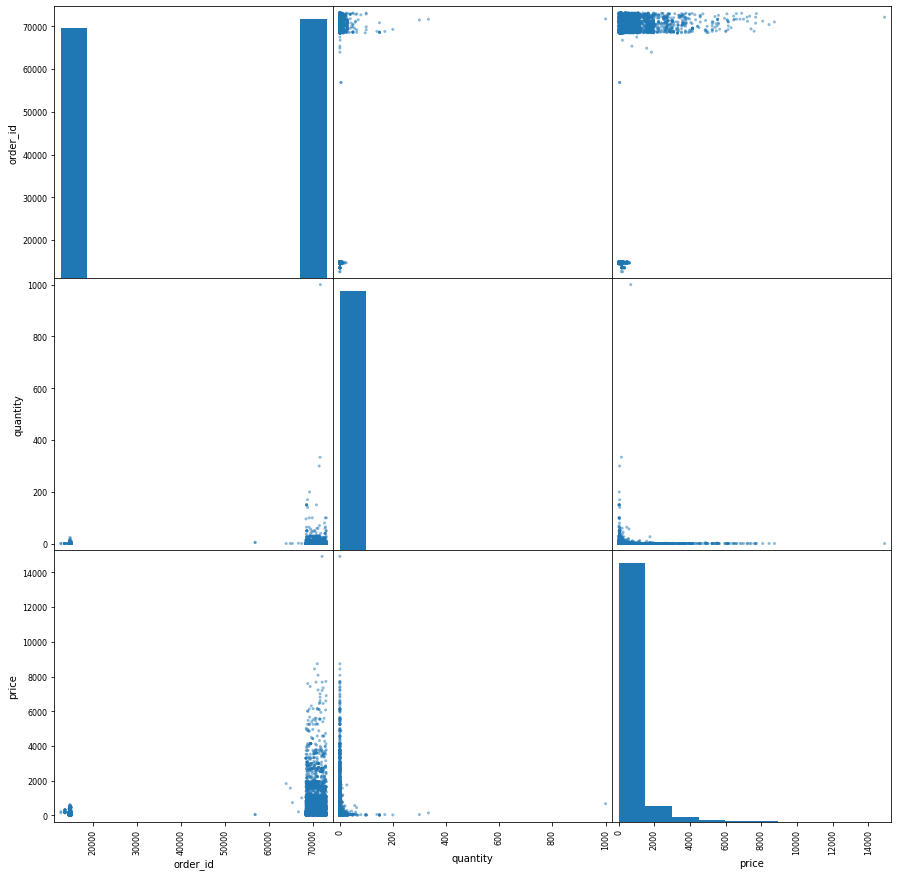

In [ ]:
pd.plotting.scatter_matrix(data, figsize = (15, 15))
plt.show()

На графике можно заметить две аномалии. Заказ на 1000 единиц товаров и товар ценой более 14000. Попробуем найти эти строки в данных.

In [ ]:
data[data['quantity'] >= 1000]

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0


Первая это заказ на 1000 вантузов. Весьма аномальый заказ.
А что со стоимостью?

In [ ]:
data[data['price'] > 14000]

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0


А это уличная сушилка, тоже кажется с весьма аномальной целой.

Конечно, возможно, что вантузы закупает оптовый покупатель и в последствии он снова будет делать заказы, но надеяться на такие данные не стоит. Так же и сушилкой, если присмотреться к ее габаритам, можно понять, что это достаточно большая вещь и возможно цена адекватна. Но в пределах нашего магазина, похожих товаров нет и вряд ли стоит на нах расчитывать.
Поэтому, я считаю, что строки с аномальными продуктами нужно удалить, а данные по суммам выручки пересчитать.

In [ ]:
data = data[data['product'] != 'вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000']
data = data[data['product'] != 'сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая']
data=data.reset_index(drop=True)

### Анализ торгового ассортимента
Теперь подробно изумим ассортимент магазина.  
Посмотрим, сколько всего товаров в магазине:

In [ ]:
data['product'].nunique()

2339

Еще раз посмотрим на датафрейм:

In [ ]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


Теперь выведем каталог - полный список товаров.

In [ ]:
pd.set_option('display.max_row', 2343)
pd.set_option('max_colwidth', 200)
katalog = data.groupby('product')['order_id'].count()
katalog = katalog.reset_index()
katalog = katalog.drop(columns='order_id')
katalog.sort_values(by='product')

,product
0,tepмокружка avex freeflow 700 мл зеленый avex0759
1,tepмокружка avex freeflow 700 мл сталь avex0776
2,tepмокружка avex recharge 500 мл голубой avex0681
3,автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114
4,агератум рассада однолетних цветов в кассете по 10 шт
5,адиантум лиза d-12 см
6,азалия индика биколор d-12 см
7,азалия индика биколор d-12 см h-20
8,азалия индика розовая d-12 см h-20
9,азалия индика фиолетовая d-10 см h-20


Товары достаточно разноплановые, поэтому тут напрашивается категоризация.
Для этого сначала первично леммизируем весь список, так будет проще определять условия для категорий.  

#### Категоризация.

In [ ]:
lemmas = []

for i in data['product'].unique():
    lemmas = ' '.join(m.lemmatize(i))
    lemmas = lemmas.split()
    print(lemmas)

['комнатный', 'растение', 'в', 'горшок', 'алый', 'вера', ',', 'd12', ',', 'h30']
['комнатный', 'растение', 'в', 'горшок', 'кофе', 'арабика', ',', 'd12', ',', 'h25']
['радермахер', 'd', '-', '12', 'см', 'h', '-', '20', 'см']
['хризолидокарпус', 'лутесценс', 'd', '-', '9', 'см']
['циперус', 'зумул', 'd', '-', '12', 'см', 'h', '-', '25', 'см']
['шеффлер', 'лузеан', 'd', '-', '9', 'см']
['юкка', 'нитчатый', 'd', '-', '12', 'см', 'h', '-', '25', '-', '35', 'см']
['настенный', 'сушилка', 'для', 'белье', 'gimi', 'brio', 'super', '100']
['таз', 'пластмассовый', '21', ',', '0', 'л', 'круглый', '"', 'водолей', '"', 'с614', ',', '1404056']
['чехол', 'для', 'гладильный', 'доска', 'colombo', 'persia', 'beige', '130х50', 'см', 'из', 'хлопок', '5379']
['вешалка', 'для', 'брюки', 'металлический', 'с', 'резиновый', 'покрытие', '26', 'см', 'цвет', ':', 'синий', ',', 'attribute', ',', 'ahs331']
['сушилка', 'для', 'белье', 'потолочный', 'zalger', 'lift', 'basic', '1520', '200', 'см', ',', '10', 'м']
['чех

Для каждой категории составим отдельный список с подходящими леммами.

In [ ]:
flowers = ['цветок', 'цветы', 'горшок', 'букет', 'цветущий', 'домашний', 'комнатный', 'однолетний', 'радермахер', 'хризолидокарпус',  'циперус', 'шеффлер', 'юкка',  'пеларгония', 'суккулент', 'эхеверие', 'эвкалипт', 'кампануть',  'нолина',  'хлорофитум', 'цикламен', 'глоксиния',  'азалия', 'гортензия',  'хризантема', 'мирт',  'кориандр', 'иссоп', 'сантолина', 'аспарагус',  'антуриум', 'молодило', 'фиалка', 'гербера', 'душица', 'мелисса', 'роза',  'бегония',  'альбук',  'бальзамин',  'крассула',  'артемизия',  'лаванда',  'мята',  'каланхое', 'примула', 'дендробиум',  'калоцефалус',  'каллун', 'капсикум',  'мимоза',  'соланум',  'бархатцы', 'косметь',  'настурция',  'петуния',  'алиссум', 'гвоздик', 'годеция', 'календула',  'кореопсис',  'лапчатка',  'флокс',  'цинерария', 'эшшольция', 'диффенбахий',  'фаленопсис',  'пуансетия',  'аптение', 'пуансеттия',  'скиммия', 'фиттоний',  'алоэ',  'спатифиллум', 'фикус', 'гимнокалициум', 'калатея', 'эхинокактус', 'гипсофил', 'калибрахоа', 'эпипремнум', 'аквилегия',  'незабудка', 'седум', 'нефролепис', 'калла', 'тюльпан',  'штангенциркуль',  'чабер', 'бакоп',  'ранункулус',  'овсянница', 'георгин', 'смолевка', 'цинния', 'вербейник', 'колокольчик', 'котовник', 'эхинацея',  'ясколка',  'афеляндра',  'виола',  'лилейник', 'папоротник', 'платикодон',  'энотера', 'вербена', 'фуксия',  'цитрофортунелла',  'пеперомия',  'гардения',  'лобелия',  'фиксатор',  'пиретрум', 'муррайя', 'вероника', 'джункус',  'драцена', 'фатсия', 'японский', 'хоста', 'гайлардий',  'монард', 'нивянник', 'рудбекия', 'барвинок', 'осина', 'пряный', 'астра', 'бузульник', 'камнеломка', 'солидаго', 'физостегия', 'бадан', 'лен', 'лавр', 'лантан', 'лаватер', 'анемон', 'валериана', 'змееголовник', 'любисток',  'табак', 'шалфей', 'вигна', 'хамедорей', 'зверобой', 'мединилла', 'импатиенс', 'замиокулькас', 'завертка', 'пахира', 'литопс', 'адиантум']
home =  ['ёрш', 'щетка',  'пакет', 'ванна', 'вантуз', 'ведро', 'веник', 'вешалка',  'хранение',  'доска',  'белье', 'коробка', 'бумага',  'ерш', 'сумка', 'тележка', 'штора', 'корыто', 'коврик', 'стремянка', 'ника',  'салфетка', 'таз', 'стяжка',  'полка',   'чехол', 'ковш', 'швабра', 'перчатки',  'ковёр', 'кофр', 'ваза', 'корзина', 'лоток', 'окно', 'ванна', 'алюминий', 'комод',  'набор', 'сушилка', 'плед', 'урна', 'скалка', 'обувь', 'наматрасник', 'ванна', 'кашпо',  'тряпкодержатель', 'пружина', 'сварка', 'полотенце', 'шприц',  'ковер', 'крючок', 'петля',  'форма', 'фоторамка', 'ролик', 'угольник', 'перчатка', 'скребок', 'контейнер', 'обувница', 'покрывало', 'сребок', 'мешок', 'халат', 'тряпка', 'ящик', 'одеяло', 'насадка', 'ручка', 'термокружок',  'дозатор', 'простыня', 'плечики', 'подушка', 'светильник', 'короб', 'подголовник', 'лопатка', ' совок', 'унитаз', 'салфетница', 'алюминиевый', 'ножницы', 'кисточка', 'сетка', 'экран', 'термос', 'ключница', 'штанга', 'наматрацник', 'бельевой', 'сверло', 'карниз', 'корзинка', 'шнур', 'пьезозажигалка', 'уголок', 'решетка', 'оконный', 'ткань', 'комплект',  'инструмент', 'наволочка', 'пододеяльник', 'детский', 'отделитель', 'веревка', 'совок', 'линейка', 'фал', 'шпагат', 'основание', 'подставка']
appliances = ['весы', 'электроштопор','окномойка', 'утюг', 'овощеварка', 'машина', 'плита', 'кипятильник', 'фен', 'миксер', 'соковарка', 'соковыжималка', 'мантоварка']
seeds = ['рассада' , 'семена', 'черенок', 'растение', 'дерево', 'арбуз', 'базилик', 'баклажан', 'дыня', 'кофе', 'кабачок', 'томат', 'тыква', 'лук', 'капуста', 'огурец', 'капуста', 'салат', 'клубника', 'земляника', 'укроп', 'тимьян', 'розмарин', 'петрушка', 'рукол', 'подсолнечник', 'сельдерей', 'горох', 'виноград', 'морковь', 'патиссон']
household = ['средство', 'антижир', 'антинакипин', 'бак', 'мытье', 'бензин', 'иж', 'мыло', 'отбеливатель','маска', 'крем']
fake = ['муляж', 'искуственный', 'искусственный']
kitchen = ['рыбочистка', 'кружка', 'банка', 'блюдо', 'скатерть', 'свч', 'нож', 'тортница’, ‘кастрюля', 'соль', 'бокал', 'паста', 'мука', 'сахарница', 'терка', 'тарелка', 'кувшин','ложка', 'салатник', 'хлебница', 'сковорода',  'чайник', 'хлебница', 'сковорода', 'миска', 'сито', 'венчик', 'блюдо', 'котел', 'толкушка', 'сотейник', 'ножеточка', 'масленка',  'блюдце', 'бульонница', 'масленка', 'орехоколка', 'овощечистка', 'термокружка', 'tepмокружка',  'термостакан', 'половник', 'пресс', 'стакан', 'губка', 'посуда', 'вилка', 'кастрюля', 'тортница']



Теперь сравнивая леммизированые названия из датафрейма со списками поделим данные на категории.

In [ ]:
def lemm_kategor(product):
    lemmas = ' '.join(m.lemmatize(product))
    lemmas = lemmas.split()
    for i in lemmas:
        if i in appliances:
            return 'бытовая техника'
        if i in fake:
            return 'исскуственные растения и муляжи'
        if i in seeds:
            return 'рассада и семена'
        if i in flowers:
            return 'цветы'
        if i in home:
            return 'товары для дома'
        if i in household:
            return 'гигиена и бытовая химия' 
        if i in kitchen:
            return 'товары для кухни'
    return 'другое'

for i in range(len(data['product'])):
    data.loc[i, 'kategor'] = lemm_kategor(data.loc[i, 'product'])
data.groupby('kategor')['product'].nunique().sort_values(ascending=False)


kategor
товары для дома                    1017
цветы                               570
рассада и семена                    356
товары для кухни                    235
исскуственные растения и муляжи     113
бытовая техника                      24
гигиена и бытовая химия              24
Name: product, dtype: int64

Посмотрим наглядно, как распределились товары по категорям в магазине.

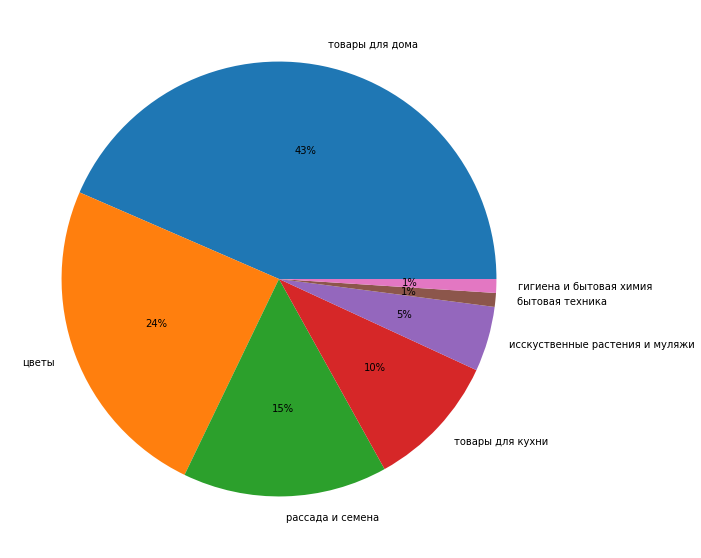

In [ ]:
plt.figure(figsize=(10, 10))
graf=data.groupby('kategor')['product'].nunique().sort_values(ascending=False)
labels=graf.index
plt.pie(graf, labels=labels, autopct='%.0f%%')
plt.show()

Всего получилось 7 определенных категорий, а также предусмотрена 8 категория "другие" на случай, если новые данные не будут подходить в имеющиеся.  

Как видно из категорий наибольшую часть ассортимента занимают "товары для дома" и "цветы".  
  
  
Взглянем, как теперь выглядит датафрейм.

In [ ]:
data.head(10)

,date,customer_id,order_id,product,quantity,price,kategor
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,цветы
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,цветы
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,цветы
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,цветы
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,цветы
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,цветы
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,цветы
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,товары для дома
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с614, 1404056",1,269.0,товары для дома
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674.0,товары для дома


Вимим, что столбец с категориями успешно добавлен в датафрейм.  

#### Анализ продаж.
Для начала предлагаю рассмотреть, какие товары продаются чаще всего.

In [ ]:
data.groupby('product')['order_id'].count().sort_values(ascending=False).head(30)

product
рассада кабачка сорт зебра кассета 6 шт e6                              79
рассада кабачка сорт золотинка кассета 6 шт e6                          78
рассада кабачка сорт белогор кассета 6 шт e6                            77
рассада кабачка сорт аэронавт, кассета по 6шт                           76
рассада огурца сорт каролина кассета 6 шт e6                            76
рассада кабачка сорт горный, кассета по 6шт                             76
тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    76
пеларгония розебудная red pandora укорененный черенок                   76
рассада огурец фараон ячейки по 6 шт е6                                 76
рассада кабачка сорт сосновский, кассета по 6шт                         75
рассада патиссона сорт нло белый, кассета по 6шт                        75
рассада патиссона сорт диск, кассета по 6шт                             74
рассада огурец кристина ячейки по 6 шт е6                               74
сумка-тележка 2-х

Видим, что первые 17 товаров наиболее активно продаются. Далее идет большой отрыв. В лидеры запишем первые 20 товаров с наибольшими продажами.  
Таблица лидеров будет выглядеть так.

In [ ]:
leader_sales = data.groupby('product')['order_id'].count().sort_values(ascending=False).head(20)
leader_sales=leader_sales.reset_index()
leader_sales

,product,order_id
0,рассада кабачка сорт зебра кассета 6 шт e6,79
1,рассада кабачка сорт золотинка кассета 6 шт e6,78
2,рассада кабачка сорт белогор кассета 6 шт e6,77
3,"рассада кабачка сорт аэронавт, кассета по 6шт",76
4,рассада огурца сорт каролина кассета 6 шт e6,76
5,"рассада кабачка сорт горный, кассета по 6шт",76
6,тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,76
7,пеларгония розебудная red pandora укорененный черенок,76
8,рассада огурец фараон ячейки по 6 шт е6,76
9,"рассада кабачка сорт сосновский, кассета по 6шт",75


Так же интересно, товары каких категорий заказывают чаще. Рассмотрим:

In [ ]:
leader_sales_kat = data.groupby('kategor')['order_id'].count().sort_values(ascending=False)
leader_sales_kat

kategor
товары для дома                    2120
цветы                              2085
рассада и семена                   1851
товары для кухни                    325
исскуственные растения и муляжи     290
бытовая техника                      35
гигиена и бытовая химия              29
Name: order_id, dtype: int64

Посмотрим наглядно распределение числа заказов по категориям.

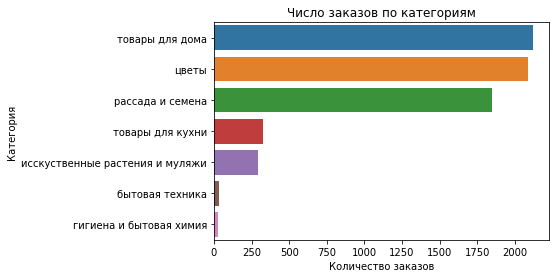

In [ ]:
leader_sales_kat1=leader_sales_kat.reset_index()

sns.barplot(x='order_id', y='kategor', data=leader_sales_kat1) 
plt.title('Число заказов по категориям')
plt.xlabel('Количество заказов')
plt.ylabel('Категория')
plt.show()

Товары для дома и Цветы продаются примерно одинаково часто. Далее немного остатают Рассада и семена.

Посчитаем сколько всего продаж приходится на лидеров:

In [ ]:
leader_sales['order_id'].sum()

1352

А сколько всего у нас заказов:

In [ ]:
data['order_id'].nunique()

2782

Соотвественно, заказов с товарами лидерами составляют почти половину всех заказов:

In [ ]:
print(round((leader_sales['order_id'].sum()/data['order_id'].nunique())*100, 1), '%')

48.6 %


А если рассмотреть соотношение лидирующей категории к общему числу проданых товаров, то мы увидим, что на категорию "Товары для дома" приходится около трети продаж.

In [ ]:
print(round((leader_sales_kat[0]/data['order_id'].count())*100, 1), '%')

31.5 %


Теперь рассмотрим аналогично с позиции получаемого дохода от продаж. Найдем товары, которые приносят больше всего прибыли.

In [ ]:
tab=data[['product', 'price', 'quantity']]
tab['total'] = tab['price']*tab['quantity']
tab=tab.groupby('product')['total'].sum().sort_values(ascending=False).head(30)
tab

/tmp/ipykernel_48/1294630505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['total'] = tab['price']*tab['quantity']


product
сумка-тележка 2-х колесная gimi argo красная                                                  76090.0
сумка-тележка 2-х колесная gimi argo синяя                                                    65281.0
простынь вафельная 200х180 см wellness rw180-01 100% хлопок                                   53232.0
сумка-тележка хозяйственная rolser bab010 rojo joy-1800 красная                               49668.0
вешалки мягкие для деликатных вещей 3 шт шоколад                                              49596.0
тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия        33992.0
сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90               33294.0
муляж яблоко 9 см красное                                                                     32702.0
гладильная доска ника гранд 122х42 см нг                                                      32382.0
набор ножей attribute chef 5 предметов akf522                             

Видим, "Сумка-тележка 2-х колесная Gimi Argo красная" и "Сумка-тележка 2-х колесная Gimi Argo синяя" возглавляют список. И вообще в начале списка довольно много Сумок-тележек. Нужно этот факт учесть.
Возьмем первые 20 товаров в лидеры.  
Таблица лидеров будет выглядеть так.

In [ ]:
leader_profit = tab.head(20)
leader_profit=leader_profit.reset_index()
leader_profit

,product,total
0,сумка-тележка 2-х колесная gimi argo красная,76090.0
1,сумка-тележка 2-х колесная gimi argo синяя,65281.0
2,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0
3,сумка-тележка хозяйственная rolser bab010 rojo joy-1800 красная,49668.0
4,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0
5,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0
6,"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",33294.0
7,муляж яблоко 9 см красное,32702.0
8,гладильная доска ника гранд 122х42 см нг,32382.0
9,набор ножей attribute chef 5 предметов akf522,29248.0


Также интересно, сколько дохода приносит каждая категория. Рассмотрим:

In [ ]:
leader_profit_kat=data[['kategor','order_id', 'price', 'quantity', 'date']]
leader_profit_kat['total'] = leader_profit_kat['price']*leader_profit_kat['quantity']
leader_profit_kat1=leader_profit_kat.groupby('kategor')['total'].sum().sort_values(ascending=False)
display(leader_profit_kat1)



/tmp/ipykernel_48/3022350643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leader_profit_kat['total'] = leader_profit_kat['price']*leader_profit_kat['quantity']


kategor
товары для дома                    3022657.0
цветы                               469632.0
товары для кухни                    259134.0
рассада и семена                    247027.0
исскуственные растения и муляжи     120483.0
бытовая техника                      32091.0
гигиена и бытовая химия              10339.0
Name: total, dtype: float64

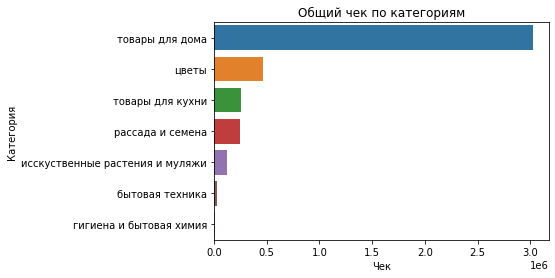

In [ ]:
leader_profit_kat2=leader_profit_kat1.reset_index()

sns.barplot(x='total', y='kategor', data=leader_profit_kat2) 
plt.title('Общий чек по категориям')
plt.xlabel('Чек')
plt.ylabel('Категория')
plt.show()

Категория Товаров для дома лидирует с огромным отрывом.   
  
Рассмотрим подробнее чеки категорий.
Построим диаграмму размаха для каждой категории.

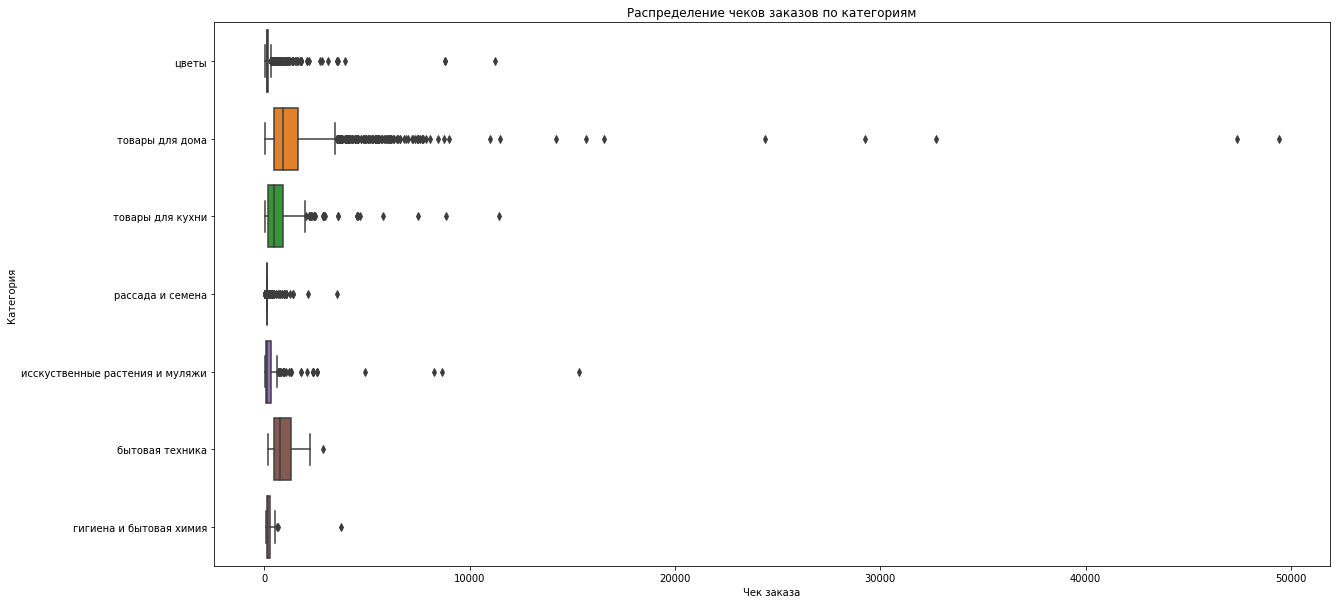

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='total', y='kategor', data=leader_profit_kat) 
plt.title('Распределение чеков заказов по категориям')
plt.xlabel('Чек заказа')
plt.ylabel('Категория')
plt.show()

В категории Товары ля дома очень много выбросов, из-за них неудается разлядеть график полностью. Я предлагаю ограничить чек 5000, чтобы разглядеть ящики с усами ближе.

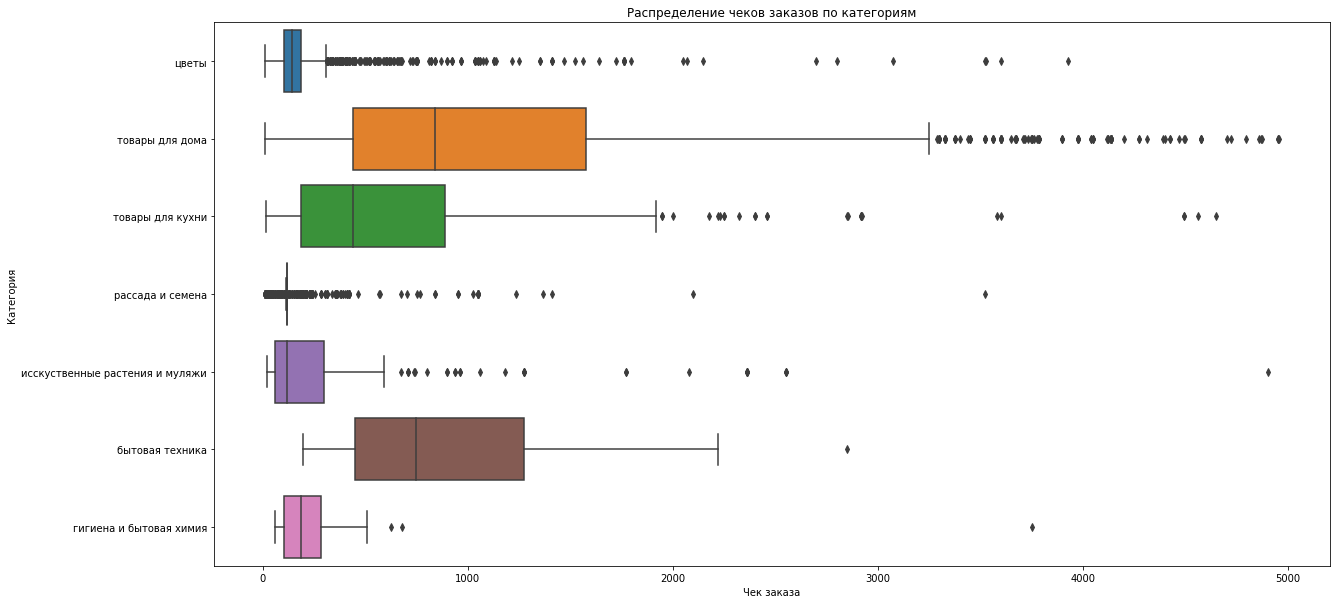

In [ ]:
leader_profit_kat_limit=leader_profit_kat[leader_profit_kat['total']<5000]

plt.figure(figsize=(20, 10))
sns.boxplot(x='total', y='kategor', data=leader_profit_kat_limit) 
plt.title('Распределение чеков заказов по категориям')
plt.xlabel('Чек заказа')
plt.ylabel('Категория')
plt.show()

Несмотря на то, что категория товаров для дома имеет достаточно много дорогих заказов, медиана чека не сильно отличается от категории Бытовой техники. Следом за ними по медиане чека идут Товары для кухни.

Какой общий доход получил интернет-магазин за время исследования?

In [ ]:
leader_profit_kat['total'].sum()

4161363.0

А какой доход нам принесли товары-лидеры?

In [ ]:
leader_profit['total'].sum()

661478.0

Сколько это в процентном соотношении?

In [ ]:
print(round((leader_profit['total'].sum()/leader_profit_kat['total'].sum())*100, 1), '%')

15.9 %


А сколько в процентном соотношении принесли магазину товары лидирующей категории Товары для дома?

In [ ]:
print(round((leader_profit_kat1[0]/leader_profit_kat['total'].sum())*100, 1), '%')

72.6 %


Несомненно, магазин "держится" на Товарах для дома.  
Попробуем определить, а есть ли такие товары, что продаются чаще всего, и при этом приносят еще и хорошую прибыль.  
То есть такие товары, которые будут состоять в обоих списках лидеров:

In [ ]:
for i in leader_sales['product']:
    for j in leader_profit['product']:
        if i == j:
            print(i)

сумка-тележка 2-х колесная gimi argo красная
сумка-тележка 2-х колесная gimi argo синяя


Обнаружили 2 товара, которые встречаются в обоих списках лидеров.
Посмотрим, к каким категориям относятся эти продукты.

In [ ]:
print(data[data['product'] == 'сумка-тележка 2-х колесная gimi argo красная']['kategor'].unique()) 
print(data[data['product'] == 'сумка-тележка 2-х колесная gimi argo синяя']['kategor'].unique())

['товары для дома']
['товары для дома']


Оба товара относятся к лидирующей категории продуктов Товары для дома.  
Можно сказать, что мы обнаружили самые выгодные для интернет-магазина товары, именно на них нужно делать ставку.  

 
Продолжим изучение данных. Посмотрим, с чем продаются популярные сумки-тележки.

In [ ]:
orders = data[data['product']== 'сумка-тележка 2-х колесная gimi argo красная']['order_id'].unique()
for i in orders:
    display(data[data['order_id'] == i])


,date,customer_id,order_id,product,quantity,price,kategor
1944,2019-02-21 18:00:00,70e80f2d-bc7e-4200-b38b-26b98a5f6d3a,70395,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2133,2019-03-03 15:00:00,c3b948ca-41f9-45b9-81bd-5b7fb7558d2c,70561,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2281,2019-03-11 10:00:00,ff422162-fc4a-4b65-a0e2-17f5095ea2c6,70681,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2589,2019-04-01 16:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2600,2019-04-02 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2622,2019-04-03 08:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2718,2019-04-07 15:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2734,2019-04-08 09:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2762,2019-04-09 19:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2815,2019-04-12 22:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2820,2019-04-13 21:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2845,2019-04-14 17:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
2854,2019-04-15 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
3532,2019-05-11 22:00:00,7d673052-9ca8-40ce-9558-c123b420b12a,71398,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
3587,2019-05-12 20:00:00,7d673052-9ca8-40ce-9558-c123b420b12a,71398,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома
3628,2019-05-13 10:00:00,7d673052-9ca8-40ce-9558-c123b420b12a,71398,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
5566,2019-06-24 17:00:00,b6662d1b-b30d-46ab-ad5c-b1780f143298,71788,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
5967,2019-07-27 09:00:00,45ba394d-9104-4b58-bd45-7e3061617dfc,72116,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6620,2019-10-16 09:00:00,cc9b5433-d190-499a-8fe4-f8cc3a00a986,72981,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6664,2019-10-21 10:00:00,9a06ca06-4fe8-4241-9e3c-b6252a2d30f0,73047,сумка-тележка 2-х колесная gimi argo красная,1,1087.0,товары для дома


In [ ]:
orders = data[data['product']== 'сумка-тележка 2-х колесная gimi argo синяя']['order_id'].unique()
for i in orders:
    display(data[data['order_id'] == i])

,date,customer_id,order_id,product,quantity,price,kategor
21,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
128,2018-10-07 20:00:00,ae8e32f4-ff7f-4ee4-bef9-f223caa9a3dd,68559,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
163,2018-10-09 11:00:00,0b0ea807-ff4e-4bbf-b6be-5b7343b8af9d,68586,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
295,2018-10-17 18:00:00,7059aee2-80ae-4cdf-9d0d-31d41f665dca,68678,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, лососевая, махровая",1,149.0,цветы
296,2018-10-17 18:00:00,7059aee2-80ae-4cdf-9d0d-31d41f665dca,68678,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, малиново розовая, простая",1,149.0,цветы
297,2018-10-17 18:00:00,7059aee2-80ae-4cdf-9d0d-31d41f665dca,68678,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
764,2018-11-11 11:00:00,dc56f3cd-a8e8-4ad8-8c1f-e9f33839273a,68947,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1044,2018-12-01 17:00:00,95d35195-81d6-400c-9f2d-bdc947d6c5bd,69163,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1090,2018-12-03 18:00:00,b6e1b916-cb3e-49fb-b500-b3d75a6f798a,69193,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1114,2018-12-05 20:00:00,732b0646-6bfc-4018-b48b-ab67004a14ab,69222,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1147,2018-12-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69273,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1203,2018-12-14 14:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69362,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1215,2018-12-15 19:00:00,0bebdf2c-584d-4197-acf4-cab837c66761,69381,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1483,2019-01-11 20:00:00,0bebdf2c-584d-4197-acf4-cab837c66761,69381,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1274,2018-12-19 20:00:00,44ffea7a-58a0-4686-8462-ae33d958ff76,69471,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1290,2018-12-21 07:00:00,fe83266d-760d-4b93-8905-586dd96012b1,69492,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1352,2018-12-24 21:00:00,d74e4e82-9e90-4eaf-b1d8-9c868e51f56f,69577,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1361,2018-12-25 21:00:00,16fb6441-59e9-4f1d-adec-690662802698,69599,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1362,2018-12-25 21:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1363,2018-12-25 22:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1364,2018-12-25 23:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1365,2018-12-26 00:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1368,2018-12-26 09:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1377,2018-12-26 15:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1394,2018-12-27 12:00:00,ccec2b0e-ea0a-4f0d-a829-88f7adbc9825,69640,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1465,2019-01-10 09:00:00,ccec2b0e-ea0a-4f0d-a829-88f7adbc9825,69640,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1479,2019-01-11 06:00:00,ccec2b0e-ea0a-4f0d-a829-88f7adbc9825,69640,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1439,2019-01-05 12:00:00,708ba953-b000-4da7-9975-ed779c2820e0,69708,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома
1442,2019-01-06 07:00:00,708ba953-b000-4da7-9975-ed779c2820e0,69708,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1792,2019-02-11 19:00:00,dc32eaf5-9f05-48ea-a5aa-bbf72ca1a4ad,70215,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1898,2019-02-18 17:00:00,ba82101c-f638-4f89-a7da-35875c710a79,70332,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
1962,2019-02-22 23:00:00,d0ac079c-c218-4d80-b5c3-72b8a36b9883,70412,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома
1963,2019-02-23 05:00:00,d0ac079c-c218-4d80-b5c3-72b8a36b9883,70412,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома
1964,2019-02-23 09:00:00,d0ac079c-c218-4d80-b5c3-72b8a36b9883,70412,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2321,2019-03-13 21:00:00,ac8ab473-462a-474f-a2d7-72c362b7075f,70725,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2354,2019-03-16 13:00:00,d1b9a14d-a7d0-49e2-ad17-475bc93e67c1,70758,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2403,2019-03-19 18:00:00,c4c37909-fd0f-4ea5-9578-54148bff0ddc,70796,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2707,2019-04-07 10:00:00,067ced0d-1e05-408e-b659-b11d41312f5e,71048,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
2724,2019-04-08 05:00:00,b67479a2-d2fc-4c24-a513-ce1f1183d9d8,71057,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
3192,2019-04-26 22:00:00,3518a0d5-7634-45e9-a810-d4e228abe5d9,71301,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
3193,2019-04-26 22:00:00,3518a0d5-7634-45e9-a810-d4e228abe5d9,71302,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
3962,2019-05-20 22:00:00,08d1c36d-1a94-4040-9cfe-f78a8e382a4a,71479,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома
3964,2019-05-21 05:00:00,08d1c36d-1a94-4040-9cfe-f78a8e382a4a,71479,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
4035,2019-05-26 13:00:00,221bc556-0465-4953-8788-01055145c66d,71516,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
5387,2019-06-16 12:00:00,c6572f3e-efc0-41d8-81d4-df5ec8dff50a,71717,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
5847,2019-07-12 20:00:00,ba7e372f-e1d1-4bef-a55d-ea866ed22e67,71959,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
5960,2019-07-26 07:00:00,b2cc8a72-4989-4aeb-8b12-41fa13dfd847,72107,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6031,2019-08-03 17:00:00,65fe3177-3007-43fc-ab11-a13f9a31815f,72195,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6140,2019-08-20 09:00:00,64903416-c1b8-48f4-97e7-ffc279eee6e8,72350,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6174,2019-08-24 16:00:00,d02429ab-22e0-4ff2-9465-3082befde444,72394,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6176,2019-08-25 11:00:00,d02429ab-22e0-4ff2-9465-3082befde444,72399,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6177,2019-08-25 11:00:00,d02429ab-22e0-4ff2-9465-3082befde444,72400,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6208,2019-08-28 12:00:00,399da134-5db6-4861-89fc-6595e7583e98,72439,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6240,2019-09-03 12:00:00,f1d58880-6d19-4369-9548-bcc78aa9f872,72490,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6301,2019-09-11 16:00:00,20fe83da-ac56-4e6d-b070-699abbd6d07e,72590,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома
6302,2019-09-11 18:00:00,20fe83da-ac56-4e6d-b070-699abbd6d07e,72590,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6441,2019-09-27 08:00:00,fd4bc7b8-6ad6-4077-8e63-3593ab5e1cfd,72781,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6569,2019-10-10 16:00:00,c95edf0c-81c3-476a-8e20-96334a8e1a58,72922,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6580,2019-10-11 10:00:00,5e8d9800-335d-441d-981a-b6b14aed1a7c,72931,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6621,2019-10-16 11:00:00,6a2bdd04-7d99-4f78-8bce-e7b37bb7abbb,72984,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6715,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома
6734,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


,date,customer_id,order_id,product,quantity,price,kategor
6731,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


Как видим, сумки-тележки в большинстве случаев покупают без дополнительных товаров в заказе. Можно использовать эти товары для привлечения внимания к дургим товарам, запускать акции на подобии "при покупке тележки впаре с чем-то получи выгоду".  

Рассмотрим, распределение сколько товаров и каких категорий продаются в заказах.  

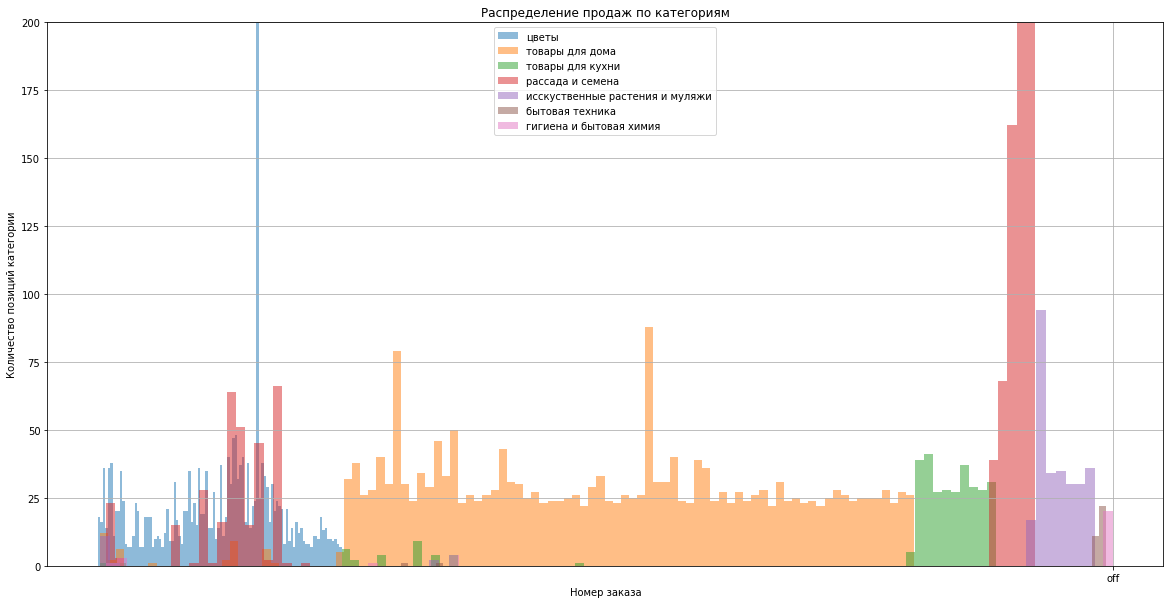

In [ ]:
products=data
products['order_id']=products['order_id'].astype('str')

plt.figure(figsize=(20, 10))

for i in products['kategor'].unique():
    graf4=products.query('kategor==@i')
    graf4['order_id'].hist(bins=100, alpha=0.5, label=i)

plt.title('Распределение продаж по категориям')
plt.xlabel('Номер заказа')  
plt.ylabel('Количество позиций категории')
plt.ylim([0, 200])
plt.legend()
plt.xticks('off')
plt.show()


На графике можно увидеть, что Товары для дома чаще всего продаются в одиночестве, как и Товары для кухни, и Исскуственные растения и муляжи.  
А вот Рассада и семена часто идет впаре с товарами из категории Цветы.  
  
Теперь давайте рассмотрим, а есть ли зависимость между продажами категорий?
Построим для этого матрицу корреляции.

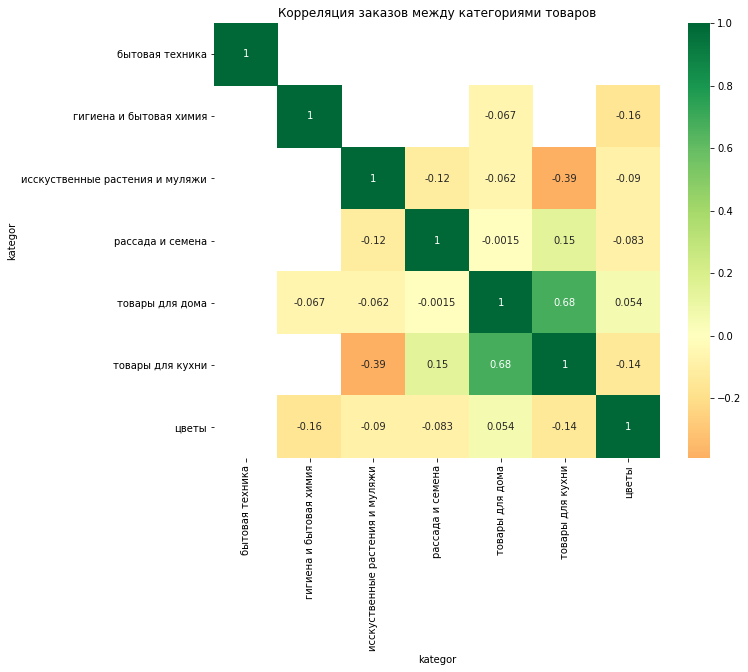

In [ ]:
matrix_corr=pd.pivot_table(data, index='date', columns='kategor', values='quantity', aggfunc='sum')

plt.figure(figsize=(10,8))
sns.heatmap(matrix_corr.corr(), xticklabels=matrix_corr.corr().columns, yticklabels=matrix_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция заказов между категориями товаров')

plt.show()

В матрице можно заметить, что товары категорий Товары для кухни и Товары для дома имеют достаточно хорошую корреляцию, то есть продажи одних товаров напрямую влияют на продажи других.  
А вот у товаров из категории Гигиена и бытовая химия практически нет корреляции ни с одний категорией. Учитывая небольшие продажи, возможно, стоит отказаться от данного вида продукции.  

Так же имеет место сезонность продаж. Проэтому предлагаю рассмотреть распределение заказов по категориям во времени.

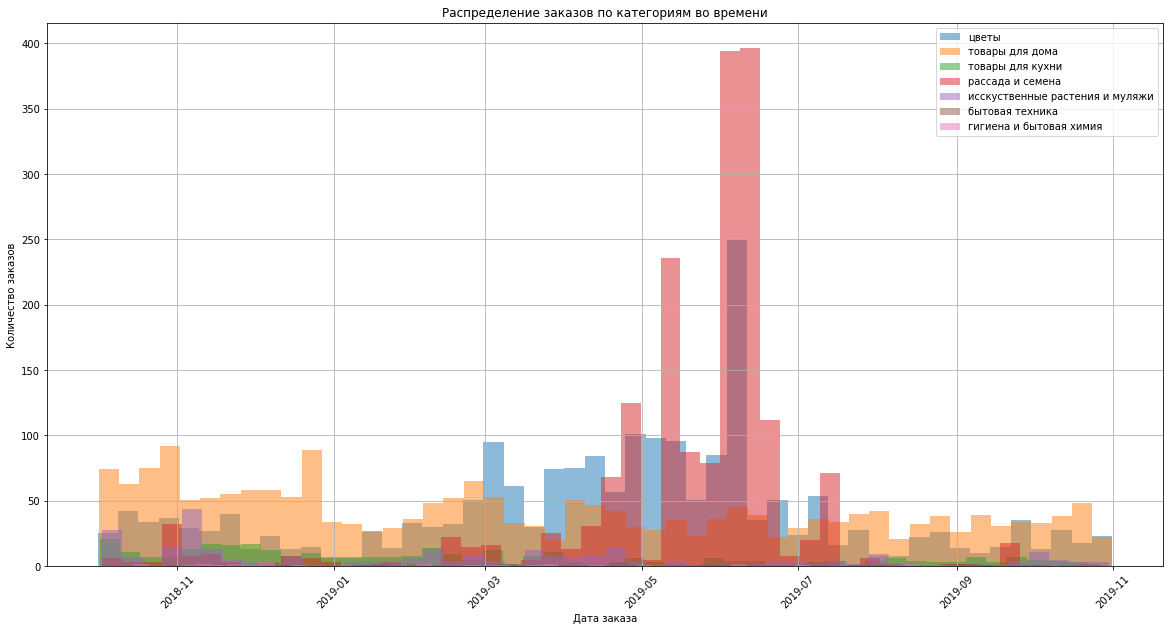

In [ ]:


plt.figure(figsize=(20, 10))

for i in data['kategor'].unique():
    graf3=data.query('kategor==@i')
    graf3['date'].hist(bins=50, alpha=0.5, label=i)

plt.title('Распределение заказов по категориям во времени')
plt.xlabel('Дата заказа')  
plt.ylabel('Количество заказов')
plt.legend()
plt.xticks(rotation=45)
plt.show()



На распределении видно, что продажи Рассады и семян стремительно увеличиваются с мая по июль. Такая же ситуация обстоит и с товарами из категории Цветы.  
Остальные категории сезонности не подвержены.

  

### Вывод.
Изучив данные мы смогли сделать несколько выводов.
Во-первых мы обнаружили аномальные данные. Вполне возможно, что это реальные заказы и цены, но для работы интернет-магазина на аномалии лучше не опираться, поэтому мы удалили их.  
Так же удалось выяснить, что в магазине имеется два очень популярных товара "сумка-тележка 2-х колесная gimi argo красная" и "сумка-тележка 2-х колесная gimi argo синяя", которые, к сожалению, в заказах продаются в одиночестве, поэтому вынесено предложение с помощью этих товаров продвигать другие, устраивая акции парной покупки.  
Также выяснили, что не смотря на гиганские продажи товаров категории Товары для дома, медианный чек для них не сильно выше, чем в других категориях.  
Изучив составы заказов, мы увидели, что чаще всего вместе продаются товары из категорий Цветы и Рассада и семены, а вот остальные категории в преобладающем большинстве продаются в одиночестве.  
Несмотря на это, построив матрицу корреляции, было обнаружено, что товары категорий Товары для дома и Товары для кухни имеют довольно сильную корреляцию. Чего нельзя сказать о категории товаров Гигиена и бытовая химия. Товары этой категории практически не имеют корреляции с другими товарами, для и вообще имеют не большие продажи.  
Ну и в заключении анализы удалось посмотреть сезонность продаж. Выяснилось, что продажи Цветов и Рассады приходятся на весенне летний период, а остальные категории сезонности не подвержены.


## Проверка гипотез. 

### Формулирование гипотез.

Я предлагаю проверить две гипотезы:
- Средний доход от продажи товаров из категории Товары для дома и товаров из категории Цветы разный.
- Востребованность (среднее количество заказов одного товара) товаров из категории Товары для дома и у товаров из категории Цветы отличается.

### Проверка гипотез.
  
####  Первая гипотеза.

Нулевая гипотеза: Средний доход от продажи товаров из категории Товары для дома и товаров из категории Цветы одинаковый.   
Альтернативная гипотеза: Средний доход от продажи товаров из категории Товары для дома и товаров из категории Цветы разный.

In [ ]:
sample_1 = data[data['kategor'] == 'товары для дома']
sample_1 = sample_1[['price', 'quantity']]
sample_1['total']=sample_1['price']*sample_1['quantity']
sample_1=sample_1['total']

sample_2 = data[data['kategor'] == 'цветы']
sample_2 = sample_2[['price', 'quantity']]
sample_2['total']=sample_2['price']*sample_2['quantity']
sample_2=sample_2['total']

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.0330399063911822e-112
Отвергаем нулевую гипотезу


Нулевую гипотезу пришлось отвергнуть, а значит, с некоторой долей вероятности средний доход от продажи товаров из категорий Товары для дома и Цветы разный.

#### Вторая гипотеза

Нулевая гипотеза: Востребованность товаров из категории Товары для дома и у товаров из категории Цветы одинаковая.   
Альтернативная гипотеза: Востребованность товаров из категории Товары для дома и у товаров из категории Цветы отличается.

In [ ]:
sample_1 = data[data['kategor'] == 'товары для дома']
sample_1 = sample_1.groupby(by='product')['quantity'].sum()

sample_2 = data[data['kategor'] == 'цветы']
sample_2 = sample_2.groupby(by='product')['quantity'].sum()

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5664653892924048
Не получилось отвергнуть нулевую гипотезу


В этом случае нулевую гипотезу отвергнуть не удалось, а значит с некоторой долей вероятности востребованность товаров из категорий Товары для дома и Цветы одинаковая.

## Общий вывод.

Мы провели исследование данных интернет-магазина товаров для дома и быта «Пока все ещё тут». 
Изучая данные мы обнаружили:
- Аномально большой заказ на 1000 вантузов, а также сушилку за более чем 14 тысяч.  
- Категоризировали товары и получили 7 категорий: товары для дома, цветы, товары для кухни, рассада и семена, исскуственные растения и муляжи, бытовая техника, гигиена и бытовая химия.
- Выяснили, что лидеры продаж составляюти 49% от всех заказов, а категория Товары для дома 31%.
- Что касается дохода, то лидеры дохода приносят лишь 16% дохода, но если рассматривать категорию Товары для дома, то она приносит все 73%.
- Нашли дла товара-"локомотива", которые отлично продаются и могли бы "тащить" за собой и другие товары. Это "сумка-тележка 2-х колесная gimi argo красная" и  "сумка-тележка 2-х колесная gimi argo синяя".
- Медианный чек категории Товары для дома не сильно отличается от чека категории Бытовая техника, которая не может похвастаться такими большими продажами.
- Товары категорий Цветы и Рассада и семена чаще всего продаются в заказах вместе.
- Преобладающее большентсво заказов продают одиночные товары.
- Товары категорий Товары для дома и Товары для кухни имеют корреляцию = 0,68, что говорит о сильной зависимоти продаж одних товаров от других.
- У товаров категории Гигиена и бытовая химия практически отсутсвует корреляция с другими категориями.
- Категории Цветы и Рассада и семена имеют продажи сезонного характера. Их активные продажи приходятся с апреля по июль.
- Товары остальных категорий сезонности не подвержены.
- Проверили две гипотезы.
- Гипотезу о том, что "Средний доход от продажи товаров из категории Товары для дома и товаров из категории Цветы одинаковый" удалось отвергнуть, а значит доход с некоторой долей вероятности отличается.
- А вот гипотезу о том, что "Востребованность товаров из категории Товары для дома и у товаров из категории Цветы одинаковая" отвергнуть не удалось, а значит товары обеих категорий востребованы примерно одинаково.